MegaMillion  
5num(1-70) + 1num(1-25)  
경우의수- 70!/(5!(70-5)! & 25  

5+1 - jackpot  

5 - $1,000,000  

4+1 - $10,000  

4- $500  

3+1- $200

3 & 2+1 - $10  

1+1 -$4  

+1 =$2  

from October 2017 1-70  

costs $2 per play

  





후나츠 사카이- 일본6num(1-43) 5번나오는숫자
-6month  
경우의 수 차이만큼 months increase?  
24wk x (70/43 x 6/5) = 32.55wks
출현 빈도수 맞춰?  

한국로또- 6num+1num

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta,datetime
import random

In [ ]:
!gdown --id 1DCekr4PgnXILradWg8ujzgZ4ql7E21QY

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DCekr4PgnXILradWg8ujzgZ4ql7E21QY
To: /content/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002 (1).csv
100% 65.2k/65.2k [00:00<00:00, 26.1MB/s]


In [ ]:
df= pd.read_csv('Lottery_Mega_Millions_Winning_Numbers__Beginning_2002 (1).csv')


In [ ]:
# 그냥 날자 계산기
jdatex= '2022-12-06'
jdatexdt = datetime.strptime(jdatex,'%Y-%m-%d')
jslice_date= jdatexdt - timedelta(weeks=24)
jslice_date

In [ ]:
df

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,09/25/2020,20 36 37 48 67,16,2.0
1,09/29/2020,14 39 43 44 67,19,3.0
2,10/02/2020,09 38 47 49 68,25,2.0
3,10/06/2020,15 16 18 39 59,17,3.0
4,10/09/2020,05 11 25 27 64,13,2.0
...,...,...,...,...
2138,11/22/2022,13 23 24 25 43,2,3.0
2139,11/25/2022,29 31 46 54 67,18,2.0
2140,11/29/2022,20 23 37 46 52,6,4.0
2141,12/02/2022,01 21 36 46 52,16,3.0


In [ ]:
df.drop(['Multiplier','Mega Ball'], axis=1, inplace=True)

df['1'] = df['Winning Numbers'].apply(lambda x: x[0:2])
df['2'] = df['Winning Numbers'].apply(lambda x: x[3:5])
df['3'] = df['Winning Numbers'].apply(lambda x: x[6:8])
df['4'] = df['Winning Numbers'].apply(lambda x: x[9:11])
df['5'] = df['Winning Numbers'].apply(lambda x: x[12:14])
# 번호 split

df['Draw Date'] = pd.to_datetime(df['Draw Date'], format='%m/%d/%Y')
# 날짜를 string에서 datetime format으로 변경

dff = df[df['Draw Date'] >= '2017-11-01']
# 2017 10월 이전 번호는 0~75까지 이후 0~70

dff.sort_values('Draw Date', ascending= False, inplace=True)
# 최근 (22/12/06)을 위로 정렬

dff.set_index(dff['Draw Date'], inplace=True)
# 날짜를 인덱스로
dff.rename(columns={'Draw Date': 'datestr'},inplace=True)
# dff.drop(['Draw Date'],axis=1,inplace=True)
dff

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,datestr,Winning Numbers,1,2,3,4,5
Draw Date,,,,,,,
2022-12-06,2022-12-06,15 16 19 28 47,15,16,19,28,47
2022-12-02,2022-12-02,01 21 36 46 52,01,21,36,46,52
2022-11-29,2022-11-29,20 23 37 46 52,20,23,37,46,52
2022-11-25,2022-11-25,29 31 46 54 67,29,31,46,54,67
2022-11-22,2022-11-22,13 23 24 25 43,13,23,24,25,43
...,...,...,...,...,...,...,...
2017-11-17,2017-11-17,03 26 55 58 70,03,26,55,58,70
2017-11-14,2017-11-14,01 14 21 22 28,01,14,21,22,28
2017-11-10,2017-11-10,06 23 38 42 58,06,23,38,42,58


In [ ]:
dateli = [pd.Timestamp(dff['datestr'][i]).strftime('%Y-%m-%d') for i in range(len(dff['datestr']))]
# 날짜를 datetime형식으로 리스트 뽑음


In [ ]:
def sakaifunc(datex): #datex = string in '%Y-%m-%d' format #하나의 날짜(회차)의 사카이 예상숫자 list로 담아
    try:
        xdate= datetime.strptime(datex,'%Y-%m-%d') #예측 회차 날짜
        datexdt = datetime.strptime(datex,'%Y-%m-%d')- timedelta(weeks=1) #그 전주

        slice_date= datexdt - timedelta(weeks=24) #그 전주에서 6개월전
        # 번호수집할 기간 슬라이싱
        # 수집기간 여기서 바꿈


        dic_count = {}
        for i in range(1,6):#당첨번호(1~5)
            for item in list(dff[datexdt:slice_date][str(i)]):
                if item not in dic_count:
                    dic_count[item] = 1
                else:
                    dic_count[item] += 1
        # 딕셔너리로 eg 33:2 -> 숫자33는2개 식으로 카운팅


        sakainum=[]
        for k,v in dic_count.items():
            if v==3 or v == 4:
                sakainum.append(k)
            #숫자등장 빈도 여기서 바꿈

        try:
            sakainum.extend(dff.loc[xdate-timedelta(days=4)]['Winning Numbers'].split())
        except:
            sakainum.extend(dff.loc[xdate-timedelta(days=3)]['Winning Numbers'].split())
        #이전회차 번호 추가

        sakainumf= sorted(list(set(sakainum))) #숫자 중복제거,정렬
        return sakainumf
    except:
        return 0 #마지막날짜용-아무숫자도 못담을때

In [ ]:
colsakai=[]
for i in dateli:
    colsakai.append(sakaifunc(i))

dfff = dff.copy()
dfff['sakai'] = colsakai
# 각날 사카이번호 추출&테아블추가

In [ ]:
datex= '2017-11-03'
datexdt = datetime.strptime(datex,'%Y-%m-%d')

slice_date= datexdt + timedelta(weeks=27)
slice_date #2018, 5, 4 -7days

dffff= dfff.loc[(dfff.index > slice_date)]
# 6개월 정보가없어 사카이 숫자가 제대로 안나오는 날짜 없앰
dffff

,datestr,Winning Numbers,1,2,3,4,5,sakai
Draw Date,,,,,,,,
2022-12-06,2022-12-06,15 16 19 28 47,15,16,19,28,47,"[01, 06, 08, 09, 10, 11, 15, 16, 17, 18, 21, 2..."
2022-12-02,2022-12-02,01 21 36 46 52,01,21,36,46,52,"[03, 06, 08, 09, 10, 11, 12, 15, 16, 17, 20, 2..."
2022-11-29,2022-11-29,20 23 37 46 52,20,23,37,46,52,"[03, 04, 06, 08, 09, 10, 11, 12, 15, 16, 17, 2..."
2022-11-25,2022-11-25,29 31 46 54 67,29,31,46,54,67,"[03, 04, 06, 08, 09, 10, 11, 12, 13, 15, 17, 2..."
2022-11-22,2022-11-22,13 23 24 25 43,13,23,24,25,43,"[02, 03, 04, 08, 09, 10, 11, 12, 13, 14, 16, 1..."
...,...,...,...,...,...,...,...,...
2018-05-29,2018-05-29,02 11 55 58 67,02,11,55,58,67,"[02, 03, 05, 06, 07, 08, 11, 13, 14, 15, 16, 1..."
2018-05-25,2018-05-25,11 14 51 64 68,11,14,51,64,68,"[02, 03, 05, 06, 07, 08, 11, 13, 15, 16, 17, 1..."
2018-05-22,2018-05-22,16 17 21 36 48,16,17,21,36,48,"[02, 03, 05, 06, 07, 08, 09, 11, 13, 15, 16, 1..."


In [ ]:
bs = []
for i in range(477):
    matches=0

    for ii in range(1,6):
        if dffff.iloc[i][str(ii)] in dffff.iloc[i]['sakai']:
            matches += 1
    if matches == 2:
        bs.append('$2')
    elif matches == 3:
        bs.append('$10')
    elif matches == 4:
        bs.append('$500')
    elif matches == 5:
        bs.append('$1000000')
    else:
        bs.append('no luck')
# 한회차의 모든 사카이 예측번호숫자중 몇개의 당첨번호가 포함됬나- (if 최선의조합 out of abt30 sakai nums)

In [ ]:
dffff['best scenario'] = bs
dffff

<ipython-input-95-07ea6f88f6f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffff['best scenario'] = bs


,datestr,Winning Numbers,1,2,3,4,5,sakai,best scenario
Draw Date,,,,,,,,,
2022-12-06,2022-12-06,15 16 19 28 47,15,16,19,28,47,"[01, 06, 08, 09, 10, 11, 15, 16, 17, 18, 21, 2...",$2
2022-12-02,2022-12-02,01 21 36 46 52,01,21,36,46,52,"[03, 06, 08, 09, 10, 11, 12, 15, 16, 17, 20, 2...",$10
2022-11-29,2022-11-29,20 23 37 46 52,20,23,37,46,52,"[03, 04, 06, 08, 09, 10, 11, 12, 15, 16, 17, 2...",no luck
2022-11-25,2022-11-25,29 31 46 54 67,29,31,46,54,67,"[03, 04, 06, 08, 09, 10, 11, 12, 13, 15, 17, 2...",$10
2022-11-22,2022-11-22,13 23 24 25 43,13,23,24,25,43,"[02, 03, 04, 08, 09, 10, 11, 12, 13, 14, 16, 1...",$10
...,...,...,...,...,...,...,...,...,...
2018-05-29,2018-05-29,02 11 55 58 67,02,11,55,58,67,"[02, 03, 05, 06, 07, 08, 11, 13, 14, 15, 16, 1...",$10
2018-05-25,2018-05-25,11 14 51 64 68,11,14,51,64,68,"[02, 03, 05, 06, 07, 08, 11, 13, 15, 16, 17, 1...",no luck
2018-05-22,2018-05-22,16 17 21 36 48,16,17,21,36,48,"[02, 03, 05, 06, 07, 08, 09, 11, 13, 15, 16, 1...",$2


In [ ]:
# 사카이숫자와 같은 양의 랜덤 숫자 뽑기

control= []
deck = list(range(1,71))
np.random.seed(1)
for i in range(477):
    np.random.shuffle(deck)
    control.append(sorted(deck[:len(dffff.iloc[i]['sakai'])]))

dffff['control'] = control
dffff

<ipython-input-107-f99ac7cde0e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffff['control'] = control


,datestr,Winning Numbers,1,2,3,4,5,sakai,best scenario,control
Draw Date,,,,,,,,,,
2022-12-06,2022-12-06,15 16 19 28 47,15,16,19,28,47,"[01, 06, 08, 09, 10, 11, 15, 16, 17, 18, 21, 2...",$2,"[3, 4, 11, 16, 22, 27, 28, 32, 34, 35, 36, 37,..."
2022-12-02,2022-12-02,01 21 36 46 52,01,21,36,46,52,"[03, 06, 08, 09, 10, 11, 12, 15, 16, 17, 20, 2...",$10,"[1, 6, 8, 9, 12, 15, 16, 17, 20, 22, 26, 28, 2..."
2022-11-29,2022-11-29,20 23 37 46 52,20,23,37,46,52,"[03, 04, 06, 08, 09, 10, 11, 12, 15, 16, 17, 2...",no luck,"[2, 5, 6, 7, 8, 11, 12, 14, 15, 16, 18, 20, 21..."
2022-11-25,2022-11-25,29 31 46 54 67,29,31,46,54,67,"[03, 04, 06, 08, 09, 10, 11, 12, 13, 15, 17, 2...",$10,"[3, 4, 7, 8, 12, 15, 16, 17, 19, 20, 22, 23, 2..."
2022-11-22,2022-11-22,13 23 24 25 43,13,23,24,25,43,"[02, 03, 04, 08, 09, 10, 11, 12, 13, 14, 16, 1...",$10,"[1, 3, 5, 6, 8, 9, 10, 14, 15, 17, 21, 25, 28,..."
...,...,...,...,...,...,...,...,...,...,...
2018-05-29,2018-05-29,02 11 55 58 67,02,11,55,58,67,"[02, 03, 05, 06, 07, 08, 11, 13, 14, 15, 16, 1...",$10,"[1, 2, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 20,..."
2018-05-25,2018-05-25,11 14 51 64 68,11,14,51,64,68,"[02, 03, 05, 06, 07, 08, 11, 13, 15, 16, 17, 1...",no luck,"[1, 4, 7, 10, 14, 16, 17, 18, 19, 21, 22, 28, ..."
2018-05-22,2018-05-22,16 17 21 36 48,16,17,21,36,48,"[02, 03, 05, 06, 07, 08, 09, 11, 13, 15, 16, 1...",$2,"[1, 6, 7, 10, 12, 13, 15, 20, 22, 24, 25, 26, ..."


In [ ]:
# 반나절 고민- list 안에 int 였는데 str숫자랑 비교했음

In [ ]:
cbs = []
for i in range(477):
    matches=0

    for ii in range(1,6):
        if int(dffff.iloc[i][str(ii)]) in dffff.iloc[i]['control']:
            matches += 1
    if matches == 2:
        cbs.append('$2')
    elif matches == 3:
        cbs.append('$10')
    elif matches == 4:
        cbs.append('$500')
    elif matches == 5:
        cbs.append('$1000000')
    else:
        cbs.append('no luck')

In [ ]:

dffff['control_bs'] = cbs
dffff

<ipython-input-108-d3f2ad32b616>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffff['control_bs'] = cbs


,datestr,Winning Numbers,1,2,3,4,5,sakai,best scenario,control,control_bs
Draw Date,,,,,,,,,,,
2022-12-06,2022-12-06,15 16 19 28 47,15,16,19,28,47,"[01, 06, 08, 09, 10, 11, 15, 16, 17, 18, 21, 2...",$2,"[3, 4, 11, 16, 22, 27, 28, 32, 34, 35, 36, 37,...",no luck
2022-12-02,2022-12-02,01 21 36 46 52,01,21,36,46,52,"[03, 06, 08, 09, 10, 11, 12, 15, 16, 17, 20, 2...",$10,"[1, 6, 8, 9, 12, 15, 16, 17, 20, 22, 26, 28, 2...",$500
2022-11-29,2022-11-29,20 23 37 46 52,20,23,37,46,52,"[03, 04, 06, 08, 09, 10, 11, 12, 15, 16, 17, 2...",no luck,"[2, 5, 6, 7, 8, 11, 12, 14, 15, 16, 18, 20, 21...",no luck
2022-11-25,2022-11-25,29 31 46 54 67,29,31,46,54,67,"[03, 04, 06, 08, 09, 10, 11, 12, 13, 15, 17, 2...",$10,"[3, 4, 7, 8, 12, 15, 16, 17, 19, 20, 22, 23, 2...",$10
2022-11-22,2022-11-22,13 23 24 25 43,13,23,24,25,43,"[02, 03, 04, 08, 09, 10, 11, 12, 13, 14, 16, 1...",$10,"[1, 3, 5, 6, 8, 9, 10, 14, 15, 17, 21, 25, 28,...",$10
...,...,...,...,...,...,...,...,...,...,...,...
2018-05-29,2018-05-29,02 11 55 58 67,02,11,55,58,67,"[02, 03, 05, 06, 07, 08, 11, 13, 14, 15, 16, 1...",$10,"[1, 2, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 20,...",$2
2018-05-25,2018-05-25,11 14 51 64 68,11,14,51,64,68,"[02, 03, 05, 06, 07, 08, 11, 13, 15, 16, 17, 1...",no luck,"[1, 4, 7, 10, 14, 16, 17, 18, 19, 21, 22, 28, ...",$10
2018-05-22,2018-05-22,16 17 21 36 48,16,17,21,36,48,"[02, 03, 05, 06, 07, 08, 09, 11, 13, 15, 16, 1...",$2,"[1, 6, 7, 10, 12, 13, 15, 20, 22, 24, 25, 26, ...",$500


In [ ]:
from collections import Counter
Counter(dffff['best scenario'])


Counter({'$2': 160, '$10': 141, 'no luck': 106, '$500': 58, '$1000000': 12})

In [ ]:
from collections import Counter
Counter(dffff['control_bs'])


Counter({'no luck': 113, '$500': 57, '$10': 136, '$2': 153, '$1000000': 18})

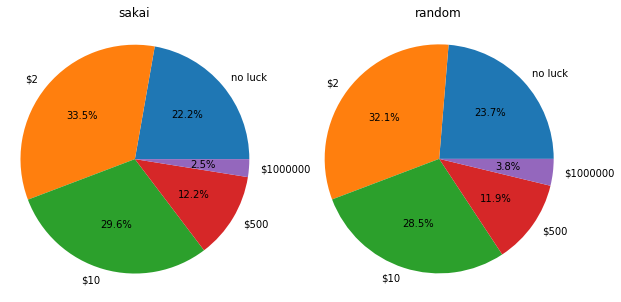

In [ ]:
plt.figure(figsize=(10,5))
slabels = []
ssizes = []

sakaic= {'no luck': 106,'$2': 160, '$10': 141, '$500': 58, '$1000000': 12}
for x, y in sakaic.items():
    slabels.append(x)
    ssizes.append(y)
plt.subplot(1,2,1)
plt.title('sakai')
plt.pie(ssizes, labels=slabels,autopct='%.1f%%')

plt.axis('equal')

labels = []
sizes = []
randc= {'no luck': 113,'$2': 153, '$10': 136, '$500': 57, '$1000000': 18}
for x, y in randc.items():
    labels.append(x)
    sizes.append(y)

plt.subplot(1,2,2)
plt.title('random')
plt.pie(sizes, labels=labels, autopct='%.1f%%')

plt.axis('equal')
plt.show()


In [ ]:
# 각 결과에 사카이 숫자(예비군숫자갯수)
sakaic= {'no luck': 106,'$2': 160, '$10': 141, '$500': 58, '$1000000': 12}
sum=0
for i in dffff[dffff['best scenario'] == 'no luck'].index:
    sum+= len(dffff.loc[i]['sakai'])
print(sum/sakaic['no luck'])

sum=0
for i in dffff[dffff['best scenario'] == '$2'].index:
    sum+= len(dffff.loc[i]['sakai'])
print(sum/sakaic['$2'])

sum=0
for i in dffff[dffff['best scenario'] == '$10'].index:
    sum+= len(dffff.loc[i]['sakai'])
print(sum/sakaic['$10'])

sum=0
for i in dffff[dffff['best scenario'] == '$500'].index:
    sum+= len(dffff.loc[i]['sakai'])
print(sum/sakaic['$500'])

sum=0
for i in dffff[dffff['best scenario'] == '$1000000'].index:
    sum+= len(dffff.loc[i]['sakai'])
print(sum/sakaic['$1000000'])

# 31.68867924528302
# 32.71875
# 33.60283687943262
# 35.224137931034484
# 35.083333333333336

31.68867924528302
32.71875
33.60283687943262
35.224137931034484
35.083333333333336


In [ ]:
# len of sakai == control
randc= {'no luck': 113,'$2': 153, '$10': 136, '$500': 57, '$1000000': 18}
sum=0
for i in dffff[dffff['control_bs'] == 'no luck'].index:
    sum+= len(dffff.loc[i]['sakai'])
print(sum/randc['no luck'])

sum=0
for i in dffff[dffff['control_bs'] == '$2'].index:
    sum+= len(dffff.loc[i]['sakai'])
print(sum/randc['$2'])

sum=0
for i in dffff[dffff['control_bs'] == '$10'].index:
    sum+= len(dffff.loc[i]['sakai'])
print(sum/randc['$10'])

sum=0
for i in dffff[dffff['control_bs'] == '$500'].index:
    sum+= len(dffff.loc[i]['sakai'])
print(sum/randc['$500'])

sum=0
for i in dffff[dffff['control_bs'] == '$1000000'].index:
    sum+= len(dffff.loc[i]['sakai'])
print(sum/randc['$1000000'])

# 31.654867256637168
# 32.49673202614379
# 34.06617647058823
# 34.666666666666664
# 35.44444444444444

31.654867256637168
32.49673202614379
34.06617647058823
34.666666666666664
35.44444444444444


In [ ]:
각당첨당 후보군 숫자 평균개수: 미약하지만 올라가는 추세


랜덤/사카이 식:
꽝- 31.65 / 31.69 개
$2- 32.50 / 32.72 개
$10- 34.07개/ 33.60 개
$500- 34.67개/ 35.23 개
$1000000- 35.44개/ 35.08 개

In [ ]:
def rangeofnum(datex):
    datexdt = datetime.strptime(datex,'%Y-%m-%d')- timedelta(weeks=1)

    slice_date= datexdt - timedelta(weeks=24)
    # 여기서 수집 기간 비꿈


    dic_count = {}
    for i in range(1,6):
        for item in list(dff[datexdt:slice_date][str(i)]):
            if item not in dic_count:
                dic_count[item] = 1
            else:
                dic_count[item] += 1


    sorted_dict = {k:v for k,v in sorted(dic_count.items())}
    numcountdf = pd.DataFrame(sorted_dict, index=[f'{slice_date.date()}~{datexdt.date()}'])
    return numcountdf
#기간별 전체 숫자카운트 데이터프레임으로

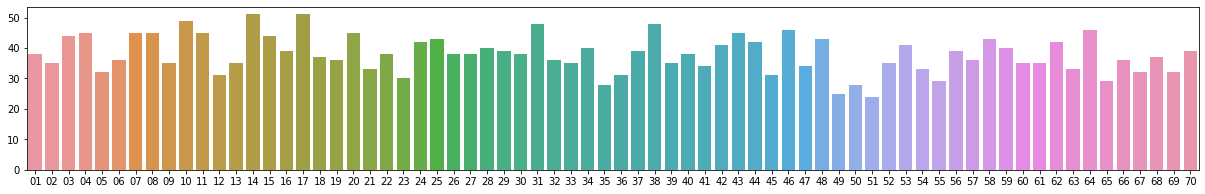

In [ ]:
dic_count = {}
for i in range(1,6):
    for item in list(dff[str(i)]):
        if item not in dic_count:
            dic_count[item] = 1
        else:
            dic_count[item] += 1


sorted_dict = {k:v for k,v in sorted(dic_count.items())}
numcountdf = pd.DataFrame(sorted_dict, index=['all count'])
plt.figure(figsize=(21,3))
sns.barplot(data=numcountdf)
# 전체기간용 2017/11/03일~2022/12/06

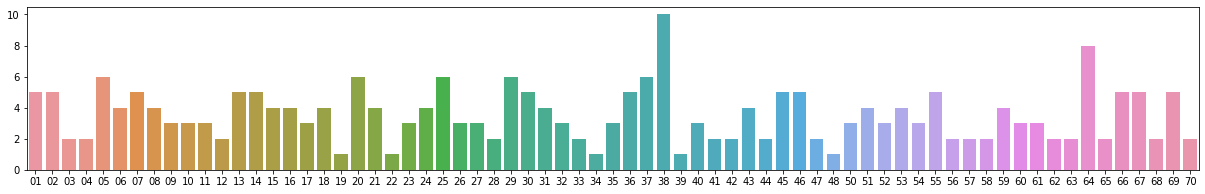

In [ ]:
plt.figure(figsize=(21,3))
sns.barplot(data=rangeofnum('2022-12-06'))
# 최근 6달

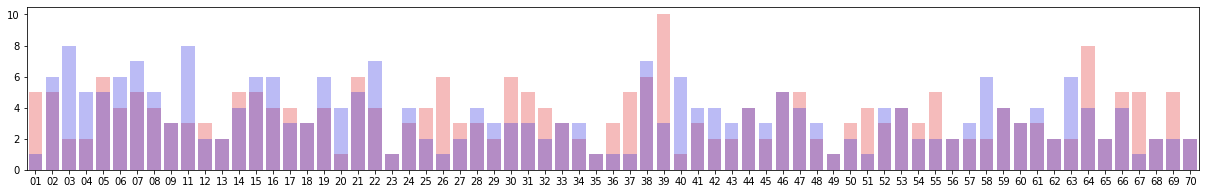

In [ ]:
# 6달단위로 숫자 빈도 비교? 내가 뭘 분석하려는지 모르겠음
plt.figure(figsize=(21,3))
# sns.barplot(data=numcountdf)
sns.barplot(data=rangeofnum('2022-12-06'),color='r',alpha=0.3,)
sns.barplot(data=rangeofnum('2022-6-21'), color='b', alpha=0.3)